# Packaging & sharing functions 

So you've created several functions to help you complete analysis on a dataset. But you know that you'll need to use these functions again in the future, and you know the work you've done will be helpful to other colleagues doing similar work. How can you package your functions up in a way that they 'stand alone'? We want them to be easily shareable, readable, and well commented so that any user can utilize them (including you, months from now when you've forgotten the details of the project). We can do this by utilizing **self documentation** in our code base! 

[This](https://realpython.com/documenting-python-code/) is a great article that goes into detail on the importance of documentation & different methods. We will go over some key strategies in this practice. 

Let's bring in some data, create some functions, and document & package them up. 

## Loading in our dataset 

We will read in `ikea.pkl`, which is a **dictionary** containing furniture item available at IKEA & corresponding attributes, edited & reformatted from [this source](https://www.kaggle.com/datasets/ahmedkallam/ikea-sa-furniture-web-scraping?resource=download).  

Recall that a dictionary is a combination of key:value pairs. In this case our "key" is the name of each furniture item, and the "value" is a list containing a few attributes. The attributes are given in the following order: `'category', 'price', 'designer'`.

Note that this is a .pkl file, or a **pickle** file, which allows us to save python data objects in their original formats (e.g. for example you could save a pandas dataframe as is, instead of having to convert it to a csv). To do so you need to import the `pickle` module, and read the data in with the following syntax: 

    ikea = pickle.load(open('ikea.pkl', "rb"))

Where `ikea.pkl` is the file name, and `"rb"` indicates that we are reading a file from binary. 

Let's read in `ikea.pkl` and save it to a variable named `ikea_dict`, then take a peek at the contents.

In [ ]:
# read data in 
import pickle
ikea_dict = pickle.load(open('ikea.pkl', "rb"))

# print 
ikea_dict

We *cannot* use an index to call a particular item! A dictionary is inherently *un-ordered*. 

We can create a list of all the product names, the "keys", like so, so we have a list of items we may want to query. 

In [ ]:
ikea_names = list(ikea_dict.keys())

#print first 10 keys 
print(ikea_names[:10])

# use a key to get its value 
ikea_dict['PLATSA']

## Creating a set of functions to work with our data

Say we are working for an interior design firm and our client has requested we select cabinets for an upcoming remodeling project. 

Let's create a function we can use to isolate all items in our dictionary which are of the category 'Cabinets & cupboards'. Since the list attributes are given in order `['category', 'price', 'designer']`, we would want to use the first (0th) item of the list to help us filter. 

The following `find_items` function will help us navigate our dictionary given the input arguments `ikea_dict`, which is our dictionary, and `item_category`, which is the type of furniture we want to filter for. The goal is to return a list of IKEA product names that we can return to our client. We will accomplish this with a few steps: 

1. Create two empty lists we can fill with keys & values of items that meet our conditions 
2. Iterate through each key in `ikea_dict` to & finding the corresponding values 
3. Checking if 'Cabinets & cupboards' is in the first value which contains the category 
4. If true then append this to our `selected_keys` list & `selected_vals` list 
5. Use `zip` to combine the two lists & use `dict` to convert them (full explanation [here](https://appdividend.com/2022/03/10/python-zip-dictionary/). 

In [ ]:
def find_products(catalog, product_type):
    selected_keys = []
    selected_vals = []
    for key in catalog:
        val = catalog[key]
        if product_type in val[0]:
            selected_keys.append(key)
            selected_vals.append(val)
    new_dict = dict(zip(selected_keys, selected_vals))
    return new_dict

In [ ]:
# use our function to find all keys whose values contain 'Cabinets & cupboards'
selection = find_products(ikea_dict, 'Cabinets & cupboards')
selection

Now we have a dictionary of potential cabinets that fit our specifications! However, due to a dispute between the client and the Löwenhielm family, the client has requested that we not include any of Eva Lilja Löwenhielm's designs.  

Let's use this information to narrow down our list. 

We don't want to modify our original funciton since we want to be able to use it for other queries, so let's nest it within a new function named `remove_designer`. We will use **dictionary comprehension** (which uses a very similar syntax to list comprehension) to keep all items in the new dictionary that do **not** contain Eva Lilja Löwenhielm's designs. 

In [ ]:
def remove_designer(catalog, product_type, designer_to_exclude):
    selection = find_products(catalog, product_type)
    refined_selection = {key: val for key, val in selection.items() if designer_to_exclude not in val}
    return refined_selection

In [ ]:
refined_selection = remove_designer(ikea_dict, 'Cabinets & cupboards', 'Eva Lilja Löwenhielm')
refined_selection

Taking a look at our new dictionary shows that her designs are removed! We can double check this by computing length and making sure those two entries are gone. 

In [ ]:
print(len(selection))
print(len(refined_selection))

<hr style="border:2px solid gray"> </hr>

### Now you try! 

What if the client wants to make sure the design was from a specific designer? Create a function named `select_designer` that takes input arguments `catalog`, `product_type`, and `designer_to_select`. Have it return a `refined_selection` that includes **only** designs from the input designer name. 

Use the function to print all `Cabinets & cupboards` designed in-house by `IKEA of Sweden`. 

In [ ]:
### BEGIN SOLUTION 

def select_designer(catalog, product_type, designer_to_select):
    selection = find_products(catalog, product_type)
    refined_selection = {key: val for key, val in selection.items() if designer_to_select in val}
    return refined_selection

select_designer(ikea_dict, 'Cabinets & cupboards', 'IKEA of Sweden')

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

Finally, we want to be able to filter by pricepoint. Our client will let us know their budget so we want to be able to filter our `refined_selection` to account for this. We use a for loop to pass through each key in our list of keys, then use a conditional to see if the second value in the list (the price) is within the client's budget. If it is, add that to our `refined_selection` dictionary to be returned. 

In [ ]:
def filter_pricepoint(input_selection, max_price):
    final_selection_keys = []
    final_selection_vals = []
    for key in list(input_selection.keys()):
        val = input_selection[key]
        if val[1] < max_price:
            final_selection_keys.append(key)           
            final_selection_vals.append(val)
    final_selection = dict(zip(final_selection_keys, final_selection_vals))
    return final_selection

final_selection = filter_pricepoint(refined_selection, max_price = 600)
final_selection

## Adding docstrings to our functions 

**Docstrings** are strings built into your functions that can be queried using the built in `help()` function. We can print the docstrings for one of python's built in functions, `enumerate`, like so:

In [ ]:
help(enumerate)

You'll see a few key features such as a summary of the function's use case, describing the input type/description for the function to work properly, and describing the expected outputs. 

We can implement these docstrings in our user-defined functions as well, making sure to include the same key properties. This is done using a string in triple quotation marks `"""` in the first line of the function. Let's add docstrings to the 3 functions we made earlier. We will also add some comments within the function to indicate what is happening at each step. You don't need to comment every single line, but its a good idea to comment out blocks that accomplish certain sub-steps. 

In [ ]:
def find_products(catalog, product_type):
    '''
    | Help on user-defined function find_products:
    |
    | This function takes inputs: 
    | - catalog - dictionary containing ikea catalog items
    | - product_type - string containing product types in catalog (first item in dict value)
    | 
    | This function returns:
    | - new_dict - a dictionary containing only catalog items that match the input product_type
    '''
    # empty list to fill with items 
    selected_keys = []
    selected_vals = []
    # loop through each key 
    for key in catalog:
    # for each key, find the values 
        val = catalog[key]
        # check if the item category is in the values
        # if it is, add it to our selection list
        if product_type in val[0]:
            selected_keys.append(key)
            selected_vals.append(val)
    # make new dict to return 
    new_dict = dict(zip(selected_keys, selected_vals))
    # return our list 
    return new_dict

def remove_designer(catalog, product_type, designer_to_exclude):
    '''
    | Help on user-defined function remove_designer:
    |
    | This function takes inputs: 
    | - catalog - dictionary containing ikea catalog items
    | - product_type - string containing product types in catalog (first item in dict value)
    | - designer_to_exclude - string containing name of designer we want to remove from selection 
    | 
    | This function returns:
    | - final_selection - a dictionary containing only catalog items that match the input product_type 
    | AND does NOT include designer_to_exclude
    '''
    # run find_products, nested function 
    selection = find_products(catalog, product_type)
    # exclude designer in selection
    refined_selection = {key: val for key, val in selection.items() if designer_to_exclude not in val}
    return refined_selection

def filter_pricepoint(input_selection, max_price):
    '''
    | Help on user-defined function filter_pricepoint:
    |
    | This function takes inputs: 
    | - input_selection - dictionary containing ikea catalog items. can be original catalog dictionary or
    | filtered `refined_selection` dict from find_products, remove_designer, or other. 
    | - max_price - int or float indicating max budget. funciton will keep everything < this value. 
    | 
    | This function returns:
    | - final_selection - a dictionary containing only catalog items that match the input product_type 
    | AND does NOT include designer_to_exclude
    '''
    # empty lists to fill with keys & vals we keep 
    final_selection_keys = []
    final_selection_vals = []
    # loop through keys, get vals 
    for key in list(input_selection.keys()):
        val = input_selection[key]
        # if within budget add keys & vals to list
        if val[1] < max_price:
            input_selection_keys.append(key)           
            input_selection_vals.append(val)
    # zip lists into a new dictionary 
    final_selection = dict(zip(final_selection_keys, final_selection_vals))
    return final_selection

In [ ]:
help(find_products)

In [ ]:
help(remove_designer)

In [ ]:
help(filter_pricepoint)

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Add docstrings for the `select_designer` function you created earlier. Print the docstring using `help()`. 

In [ ]:
### BEGIN SOLUTION 

def select_designer(catalog, product_type, designer_to_select):
    '''    
    | Help on user-defined function select_designer:
    |
    | This function takes inputs: 
    | - catalog - dictionary containing ikea catalog items
    | - product_type - string containing product types in catalog (first item in dict value)
    | - designer_to_select - string containing name of designer we want to keep (exclude every other designer)
    | 
    | This function returns:
    | - refined_selection - a dictionary containing only catalog items that match the input product_type 
    | AND is designed by designer_to_select
    '''
    selection = find_products(catalog, product_type)
    refined_selection = {key: val for key, val in selection.items() if designer_to_select in val}
    return refined_selection

help(select_designer)

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

## Packaging a set of functions into a module

A **module** is a set of definitions/functions pacakged into a script that can be called into any workspace. This is simply a `.py` file that contains our function definitions. For example a module called `ikea_functions.py` could be called in using `import ikea_functions`. The syntax is the same as when we import other packages such as pandas or matplotlib. 

Let's create a module called `ikea_functions` that contains all the functions we defined. You can do this in a text editor where you simply name the file `ikea_functions.py` or you can use the method below to write a file directly from jupyter:

In [ ]:
%%writefile ikea_functions.py

def find_products(catalog, product_type):
    '''
    | Help on user-defined function find_products:
    |
    | This function takes inputs: 
    | - catalog - dictionary containing ikea catalog items
    | - product_type - string containing product types in catalog (first item in dict value)
    | 
    | This function returns:
    | - new_dict - a dictionary containing only catalog items that match the input product_type
    '''
    # empty list to fill with items 
    selected_keys = []
    selected_vals = []
    # loop through each key 
    for key in catalog:
    # for each key, find the values 
        val = catalog[key]
        # check if the item category is in the values
        # if it is, add it to our selection list
        if product_type in val[0]:
            selected_keys.append(key)
            selected_vals.append(val)
    # make new dict to return 
    new_dict = dict(zip(selected_keys, selected_vals))
    # return our list 
    return new_dict

def remove_designer(catalog, product_type, designer_to_exclude):
    '''
    | Help on user-defined function remove_designer:
    |
    | This function takes inputs: 
    | - catalog - dictionary containing ikea catalog items
    | - product_type - string containing product types in catalog (first item in dict value)
    | - designer_to_exclude - string containing name of designer we want to remove from selection 
    | 
    | This function returns:
    | - final_selection - a dictionary containing only catalog items that match the input product_type 
    | AND does NOT include designer_to_exclude
    '''
    # run find_products, nested function 
    selection = find_products(catalog, product_type)
    # exclude designer in selection
    refined_selection = {key: val for key, val in selection.items() if designer_to_exclude not in val}
    return refined_selection

def filter_pricepoint(input_selection, max_price):
    '''
    | Help on user-defined function filter_pricepoint:
    |
    | This function takes inputs: 
    | - input_selection - dictionary containing ikea catalog items. can be original catalog dictionary or
    | filtered `refined_selection` dict from find_products, remove_designer, or other. 
    | - max_price - int or float indicating max budget. funciton will keep everything < this value. 
    | 
    | This function returns:
    | - final_selection - a dictionary containing only catalog items that match the input product_type 
    | AND does NOT include designer_to_exclude
    '''
    # empty lists to fill with keys & vals we keep 
    final_selection_keys = []
    final_selection_vals = []
    # loop through keys, get vals 
    for key in list(input_selection.keys()):
        val = input_selection[key]
        # if within budget add keys & vals to list
        if val[1] < max_price:
            input_selection_keys.append(key)           
            input_selection_vals.append(val)
    # zip lists into a new dictionary 
    final_selection = dict(zip(final_selection_keys, final_selection_vals))
    return final_selection

def select_designer(catalog, product_type, designer_to_select):
    '''    
    | Help on user-defined function select_designer:
    |
    | This function takes inputs: 
    | - catalog - dictionary containing ikea catalog items
    | - product_type - string containing product types in catalog (first item in dict value)
    | - designer_to_select - string containing name of designer we want to keep (exclude every other designer)
    | 
    | This function returns:
    | - refined_selection - a dictionary containing only catalog items that match the input product_type 
    | AND is designed by designer_to_select
    '''
    selection = find_products(catalog, product_type)
    refined_selection = {key: val for key, val in selection.items() if designer_to_select in val}
    return refined_selection



Let's clear our variable space, import our module using `import ikea_functions` & re-load our ikea file to test this. 

In [ ]:
# reset variables space 
# run this then type 'y' when prompted
%reset

In [ ]:
# reload file
import pickle
ikea_dict = pickle.load(open('ikea.pkl', "rb"))

# import the entire module 
import ikea_functions

# and use dir to print all functions within the module 
dir(ikea_functions)

You see above that our four functions are listed within the new `ikea_functions` we imported! We can access a particular function using dot notation like this: 

In [ ]:
ikea_functions.find_products(ikea_dict, 'Beds')

We could also import only a single function from the module & use it, like so: 

In [ ]:
from ikea_functions import find_products

find_products(ikea_dict, 'Beds')

See that our docstrings can be printed too! 

In [ ]:
help(ikea_functions.remove_designer)

Importing a module is a lot less cumbersome than redefining the function in every script you want to use it. This makes it easy to re-use functions in multiple scripts. If you make a change to a function in the module, it will carry through to every usage of the function thereafter, whereas if you were to have the function defined in multiple scripts it is likely you will forget to change every instance and the "same" function will behave differently in multiple scripts. 

It also makes it more easily shareable, as you can simply send one .py file to a colleage and they can import the functions you made. This way they will not have to hard code them themselves or copy/paste from a different script. The use of docstrings in your module functions allows you or a colleague to easily access documentation so you don't need to re-inspect the entire funtion to remember inputs, formats, etc. 

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Use the `remove_designer` function from our module (by importing the function directly or using dot notation) and find all 'Beds' NOT designed by 'IKEA of Sweden'

In [ ]:
### BEGIN SOLUTION 

ikea_functions.remove_designer(ikea_dict, 'Beds', 'IKEA of Sweden')

### END SOLUTION

<hr style="border:2px solid gray"> </hr>

# Practice on your own 

In this practice section you will be working with video game data from IGN, a video game website, found [here](https://github.com/erilyth/DeepLearning-Challenges/blob/master/Sentiment_Analysis/ign.csv). 

Load in the first 500 rows of `ign.csv` like so:

In [1]:
import pandas as pd
ign = pd.read_csv('ign.csv', nrows = 500)
ign.head()
ign.platform.unique()

array(['PlayStation Vita', 'iPad', 'Xbox 360', 'PlayStation 3',
       'Macintosh', 'PC', 'iPhone', 'Nintendo DS', 'Nintendo 3DS',
       'Android', 'Wii', 'PlayStation 4', 'Wii U', 'Linux',
       'PlayStation Portable', 'PlayStation', 'Nintendo 64', 'Saturn'],
      dtype=object)

#### Exercise 1. Create a function called `get_platform` that returns a dataframe containing only data from the platform listed in the input argument (iPad, Xbox 360, Playstation Vita, ...). Use this function to create a dataframe of games for the PlayStation Vita. Add useful docstrings to the function. 

#### Use this function to create a dataframe named `ps_vita` that contains all the games released on the 'Playstation Vita'. 

In [2]:
### BEGIN SOLUTION 

def get_platform(games_df, target_platform):
    """
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform
    """
    platform_only = games_df[games_df['platform'] == target_platform]
    return platform_only

ps_vita = get_platform(ign, 'PlayStation Vita')
ps_vita.head()

### END SOLUTION 

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
56,56,Okay,Madden NFL 13,/games/madden-nfl-2013/vita-128100,PlayStation Vita,6.0,Sports,N,2012,8,24
88,88,Bad,FIFA Soccer 13,/games/fifa-2013/vita-115689,PlayStation Vita,4.0,Sports,N,2012,10,12
91,91,Mediocre,New Little King's Story,/games/new-kings-story/vita-116369,PlayStation Vita,5.8,RPG,N,2012,10,11


#### Exercise 2. Create a function named `bar_plot_genres` that makes a bar plot out of the `genre` column for the data for a certain target platform. The function should take `target_platform` as an input argument, and return a bar plot where each bar measures the number of games in each category. You will need to create and add a new column, `primary_genre`, to the dataframe, which contains either the only genre listed or only the primary (first) one listed for each game. You do not need to return the altered dataframe. 

#### Add meaningful comments to the blocks of code within your function & add descriptive docstrings. 

#### Finally, use this function to plot the genres of PlayStation Vita games. 

<ipython-input-3-628a1c355930>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_platform['primary_genre'] = primary_genres


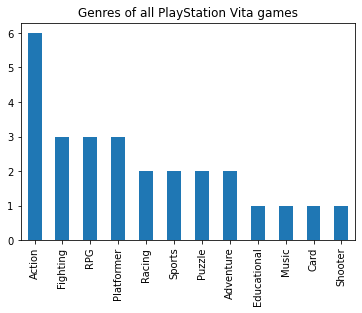

In [3]:
### BEGIN SOLUTION 

def bar_plot_genres(games_df, target_platform):
    """
    | Help on user-defined function bar_plot_genres:
    |
    | This function creates a bar plot of primary genres for games of a certain platform. 
    | Creates a new column called 'primary_genre' with first listed genre for each game. 
    |
    | Takes the following inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform
    | - bar plot showing count of each primary genre for that gaming platform 
    """
    # get games from this platform 
    this_platform = get_platform(games_df, target_platform)
    # if comma, then only keep text before comma (first entry in genre)
    # add to empty list 
    primary_genres = []
    for index, row in this_platform.iterrows():
        comma_count = row.genre.count(',')
        if comma_count == 0:
            primary_genres.append(row.genre)
        else:
            primary_only = row.genre.split(', ')[0]
            primary_genres.append(primary_only)
    # add new column with primary genres only 
    this_platform['primary_genre'] = primary_genres
    # plot 
    this_platform.primary_genre.value_counts().plot.bar(title = 'Genres of all ' + target_platform + ' games')

bar_plot_genres(ign, 'PlayStation Vita')

### END SOLUTION 

#### Exercise 3. Say you have found an old module in your code base, and you don't remember the details of what each function does. Using `get_platform` function you just made, demonstrate how would you go about accessing the documentation for a forgotten function. 

In [4]:
help(get_platform)

Help on function get_platform in module __main__:

get_platform(games_df, target_platform)
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform



#### Exercise 4. Create a module that packages together your `get_platform` and `bar_plot_genres` functions, named `ign_functions.py`. You can either use a text editor to create a .py file, or write the file directly from Jupyter Notebook. 

In [9]:
### BEGIN SOLUTION 

%%writefile ign_functions.py # will not work if after commented line, line magic must be ONLY thing in cell

def get_platform(games_df, target_platform):
    """
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform
    """
    platform_only = games_df[games_df['platform'] == target_platform]
    return platform_only

def bar_plot_genres(games_df, target_platform):
    """
    | Help on user-defined function bar_plot_genres:
    |
    | This function creates a bar plot of primary genres for games of a certain platform. 
    | Creates a new column called 'primary_genre' with first listed genre for each game. 
    |
    | Takes the following inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform
    | - bar plot showing count of each primary genre for that gaming platform 
    """
    # get games from this platform 
    this_platform = get_platform(games_df, target_platform)
    # if comma, then only keep text before comma (first entry in genre)
    # add to empty list 
    primary_genres = []
    for index, row in this_platform.iterrows():
        comma_count = row.genre.count(',')
        if comma_count == 0:
            primary_genres.append(row.genre)
        else:
            primary_only = row.genre.split(', ')[0]
            primary_genres.append(primary_only)
    # add new column with primary genres only 
    this_platform['primary_genre'] = primary_genres
    # plot 
    this_platform.primary_genre.value_counts().plot.bar(title = 'Genres of all ' + target_platform + ' games')

### END SOLUTION 

UsageError: Line magic function `%%writefile` not found.


#### Exercise 5. Read in the functions from your new `ign_functions` module & print the docstrings for each. Use the appropriate function in the module to create a bar plot of genres of Nintendo DS games. 

Help on function get_platform in module ign_functions:

get_platform(games_df, target_platform)
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform

Help on function bar_plot_genres in module ign_functions:

bar_plot_genres(games_df, target_platform)
    | Help on user-defined function bar_plot_genres:
    |
    | This function creates a bar plot of primary genres for games of a certain platform. 
    | Creates a new column called 'primary_genre' with first listed genre for each game. 
    |
    | Takes the following inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on
    

/Users/sofiarocco/Documents/upwork/modal/intermediate-python/sprint-1/practice-3/ign_functions.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_platform['primary_genre'] = primary_genres


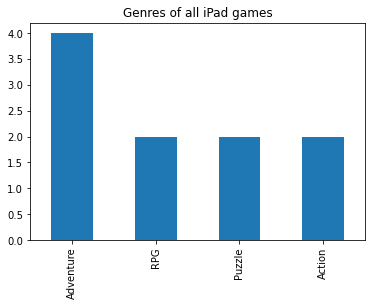

In [7]:
### BEGIN SOLUTION 

import ign_functions

help(ign_functions.get_platform)
help(ign_functions.bar_plot_genres)

ign_functions.bar_plot_genres(ign, 'iPad')

### END SOLUTION 